In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import func_module as func

In [2]:
df = pd.read_csv('data/survey_results_public.csv', index_col='Respondent')
schema_df = pd.read_csv('data/survey_results_schema.csv', index_col='Column')

In [3]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [128]:
df.head(5)

,MainBranch,Hobbyist,Employment,Country,Age1stCode,CareerSat,JobSat,ConvertedComp,LanguageWorkedWith,LanguageDesireNextYear,OpSys,Age,Gender,Continent
Respondent,,,,,,,,,,,,,,
1,Student,Yes,"Not employed, and not looking for work",United Kingdom,10,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C++,Windows,14.0,Man,EU
2,Student,No,"Not employed, but looking for work",Bosnia and Herzegovina,17,NaN,NaN,NaN,C++;HTML/CSS;Python,Elixir,Windows,19.0,Man,EU
3,Semi_Developer,Yes,Employed full-time,Thailand,22,Slightly satisfied,Slightly satisfied,8820.0,HTML/CSS,C,Linux-based,28.0,Man,AS
4,Developer,No,Employed full-time,United States,16,Very satisfied,Slightly satisfied,61000.0,C;C++;C#;Python;SQL,HTML/CSS,Windows,22.0,Man,NA
5,Developer,Yes,Employed full-time,Ukraine,14,Very dissatisfied,Slightly dissatisfied,NaN,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Python,Linux-based,30.0,Man,EU


##### Data Cleaning

Removing not required column

In [7]:
df.drop(columns=['OpenSourcer', 'OpenSource', 'Student', 'EdLevel','UndergradMajor', 'EduOther',
       'OrgSize','YearsCodePro', 'MgrIdiot', 'MgrWant', 'JobSeek',
       'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate',
       'CurrencySymbol',
       'WorkWeekHrs', 'WorkPlan', 'WorkChallenge',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'Containers',  'CurrencyDesc', 'CompTotal', 'CompFreq',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn',
       'SocialMedia', 'Extraversion', 'ScreenName', 'OpSys ', 'SOVisit1st',
       'SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved',
       'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams',
       'SOComm', 'WelcomeChange', 'SONewContent', 'MgrMoney', 'Trans',
       'Sexuality', 'Ethnicity', 'Dependents', 'DevType',
       'YearsCode', 'SurveyLength', 'SurveyEase'], inplace=True)

Adding continent column to the Dataframe

In [8]:
df['Continent'] = get_continent(df['Country'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88883 entries, 1 to 88863
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              88331 non-null  object 
 1   Hobbyist                88883 non-null  object 
 2   Employment              87181 non-null  object 
 3   Country                 88751 non-null  object 
 4   Age1stCode              87634 non-null  object 
 5   CareerSat               72847 non-null  object 
 6   JobSat                  70988 non-null  object 
 7   ConvertedComp           55823 non-null  float64
 8   LanguageWorkedWith      87569 non-null  object 
 9   LanguageDesireNextYear  84088 non-null  object 
 10  OpSys                   87851 non-null  object 
 11  Age                     79210 non-null  float64
 12  Gender                  85406 non-null  object 
 13  Continent               88883 non-null  object 
dtypes: float64(2), object(12)
memory usage

###### So now we know the datatypes of the columns and hence now we will be converting them to their required data tyes.

Let's Start with MainBranch to Category type and from MainBranch we will remove all the empty data as Student

In [10]:
MainBranch = []
for i in df['MainBranch']:
    if i == 'I am a developer by profession':
        MainBranch.append('Developer')
    elif i == 'I am a student who is learning to code':
        MainBranch.append('Student')
    elif i == 'I am not primarily a developer, but I write code sometimes as part of my work':
        MainBranch.append('Semi_Developer')
    elif i == 'I code primarily as a hobby':
        MainBranch.append('Hobby') 
    elif i == 'I used to be a developer by profession, but no longer am':
        MainBranch.append('Ex_Developer')
    else:
        MainBranch.append('Student')
df['MainBranch'] = MainBranch

df=df.astype({"MainBranch":"category"})

Defining Gender category in Man, Woman and Others

In [11]:
Gender = []
for i in df['Gender']:
    if i == 'Man':
        Gender.append('Man')
    elif i == 'Woman':
        Gender.append('Woman')
    else:
        Gender.append('Other')
df['Gender'] = Gender
# df['Gender'] = df['Gender'].astype('category', inplace=True)
df = df.astype({"Gender":"category"})

Replacing Nan and other with zero(0) in Age1stCode column

In [12]:
df['Age1stCode'] = df['Age1stCode'].replace(np.nan, 0)
df['Age1stCode'] = df['Age1stCode'].replace('Younger than 5 years', 0)
df['Age1stCode'] = df['Age1stCode'].replace('Older than 85', 0)

##### For Country, We don't have other option as to remove the entire row without Country column.

In [13]:
Country = df['Country'].value_counts().index
filters = []
for i in df['Country']:
    filters.append(i in Country)
    
df = df[filters]

##### a. Find the average age of developers when they wrote their first line of code.

In [46]:
total = 0
count = 0
for i in df['Age1stCode']:
    if int(i) == 0:
        continue
    total += int(i)
    count += 1

print('Average age of developers when they wrote their first line of code.\n', round(total/count))
# print(total/count)

Average age of developers when they wrote their first line of code.
 15


#### b. The percentage of developers who know python in each country.

In [77]:
data = df['LanguageWorkedWith'].str.contains('Python', na=False)
py_dev_data = df.loc[filt, 'Country'].value_counts(normalize=True).mul(100).reset_index()
py_dev_data = py_dev_data.rename(columns = {'index':'Country','Country':'PyDeveloperPercentage'})
py_dev_data = py_dev_data[:30]
py_dev_data

,Country,PyDeveloperPercentage
0,United States,23.631363
1,India,10.095850
2,Germany,6.974753
3,United Kingdom,6.455506
4,Canada,3.768051
5,France,2.770254
6,Poland,2.318369
7,Netherlands,2.262234
8,Australia,2.206099
9,Brazil,2.060148


<AxesSubplot:xlabel='PyDeveloperPercentage', ylabel='Country'>

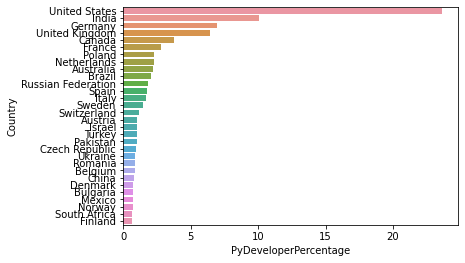

In [76]:
sns.barplot(y='Country',x='PyDeveloperPercentage',data = py_dev_data)

#### c. Generate a report for the average salary of developer based on continent.

In [38]:
num = df['Continent'].value_counts()
total = df.groupby('Continent')['ConvertedComp'].sum()
data = (total/num).sort_values(ascending=False)
data = data.reset_index()


data.rename(columns={0:'Average income in USD','index':'Continent'}, inplace=True)

update_df = data.drop(3) 
update_df

,Continent,Average income in USD
0,NA,159420.535263
1,OC,110157.450698
2,EU,64379.597670
4,SA,23465.178800
5,AS,16946.805451
6,AF,15979.843704


<AxesSubplot:xlabel='Average income in USD', ylabel='Continent'>

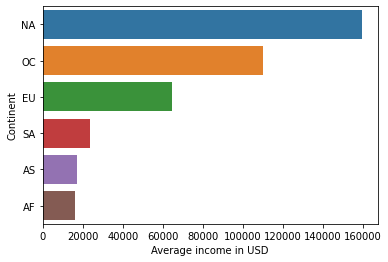

In [70]:
sns.barplot(y='Continent',x='Average income in USD',data = update_df)

#### d. Based on survey, the most desired programming language for the year 2020?

In [114]:
data = df['LanguageDesireNextYear'].value_counts().head(10).reset_index()
data
# sns.barplot(y='index',x='LanguageDesireNextYear',data = data)

,index,LanguageDesireNextYear
0,Python,1236
1,HTML/CSS;JavaScript,697
2,HTML/CSS;JavaScript;TypeScript,648
3,C#,607
4,Java,584
5,C#;HTML/CSS;JavaScript;SQL,572
6,C#;HTML/CSS;JavaScript;SQL;TypeScript,568
7,HTML/CSS;JavaScript;PHP;SQL,548
8,Go,420
9,HTML/CSS;JavaScript;Python,399


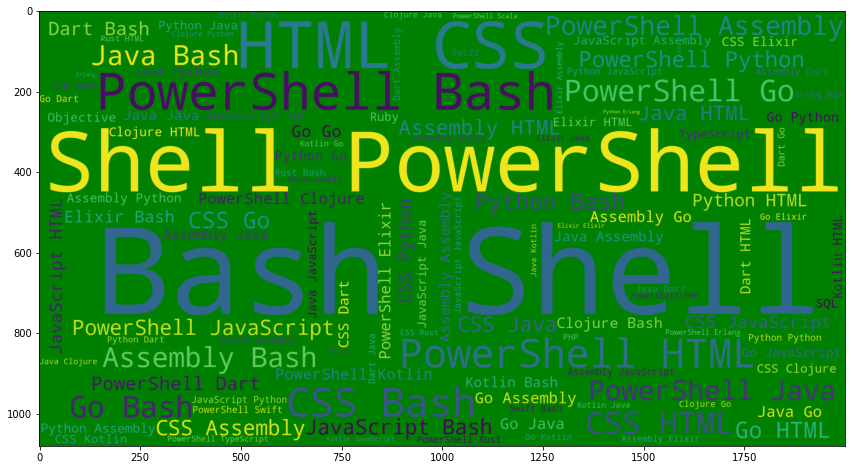

In [136]:
func.generate_word_coloud(df['LanguageDesireNextYear'], 'Green')

##### e. What is the distribution of people who code as a hobby based on gender and continent?

In [85]:
filt = (df['Hobbyist'] == 'Yes')
filt_data = df.loc[filt, 'Gender'].value_counts().head().reset_index()
final_data = filt_data.rename(columns={'index':'Gender', 'Gender':'Number of people code as hobby'})
final_data

,Gender,Number of people code as hobby
0,Man,63619
1,Woman,4026
2,Other,3612


<AxesSubplot:xlabel='Number of people code as hobby', ylabel='Gender'>

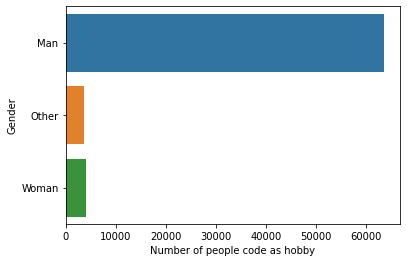

In [84]:
sns.barplot(y='Gender',x='Number of people code as hobby',data = final_data)

In [92]:
filt_data = df.loc[filt, 'Continent'].value_counts().head(6).reset_index()
final_data = filt_data.rename(columns = {'index':'Continent', 'Continent':'Number of people code as hobby'})
final_data

,Continent,Number of people code as hobby
0,EU,29362
1,NA,20410
2,AS,14314
3,SA,2598
4,AF,2149
5,OC,2013


<AxesSubplot:xlabel='Number of people code as hobby', ylabel='Continent'>

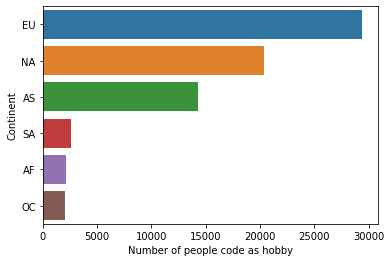

In [93]:
sns.barplot(y='Continent',x='Number of people code as hobby',data = final_data)

#### f.  Generate the report for job and career satisfaction of developer based on their gender and continent

###### career satisfaction of developer based on their gender

In [28]:
func.genrate_satisfaction_data(df,'CareerSat','Gender')

Very satisfied developer with their Career
 Man      25940
Woman     2085
Other     1148
Name: Gender, dtype: int64
Slightly satisfied developer with their Career
 Man      22264
Woman     1687
Other     1067
Name: Gender, dtype: int64
Slightly dissatisfied developer with their Career
 Man      6758
Woman     540
Other     372
Name: Gender, dtype: int64
Very dissatisfied developer with their Career
 Man      3277
Other     232
Woman     225
Name: Gender, dtype: int64
Neither satisfied nor dissatisfied developer with their Career
 Man      6290
Other     503
Woman     459
Name: Gender, dtype: int64


###### career satisfaction of developer based on their Continent

In [29]:
func.genrate_satisfaction_data(df,'CareerSat','Continent')

Very satisfied developer with their Career
 EU    11206
NA    11037
AS     4281
SA     1004
OC      876
Name: Continent, dtype: int64
Slightly satisfied developer with their Career
 EU    11125
NA     6655
AS     4731
SA     1017
OC      736
Name: Continent, dtype: int64
Slightly dissatisfied developer with their Career
 EU    3173
AS    1902
NA    1752
SA     370
AF     216
Name: Continent, dtype: int64
Very dissatisfied developer with their Career
 EU    1363
AS     968
NA     879
SA     267
AF     153
Name: Continent, dtype: int64
Neither satisfied nor dissatisfied developer with their Career
 EU    2937
AS    2160
NA    1409
SA     293
AF     219
Name: Continent, dtype: int64


###### Job satisfaction of developer based on their gender

In [31]:
func.genrate_satisfaction_data(df,'JobSat','Gender')

Very satisfied developer with their Job
 Man      19762
Woman     1772
Other      918
Name: Gender, dtype: int64
Slightly satisfied developer with their Job
 Man      21719
Woman     1547
Other      941
Name: Gender, dtype: int64
Slightly dissatisfied developer with their Job
 Man      9608
Woman     706
Other     438
Name: Gender, dtype: int64
Very dissatisfied developer with their Job
 Man      4257
Woman     330
Other     270
Name: Gender, dtype: int64
Neither satisfied nor dissatisfied developer with their Job
 Man      7757
Woman     493
Other     470
Name: Gender, dtype: int64


In [32]:
func.genrate_satisfaction_data(df,'JobSat','Continent')

Very satisfied developer with their Job
 EU    9177
NA    8454
AS    2914
SA     714
OC     710
Name: Continent, dtype: int64
Slightly satisfied developer with their Job
 EU    10428
NA     6803
AS     4604
SA      961
OC      702
Name: Continent, dtype: int64
Slightly dissatisfied developer with their Job
 EU    4419
NA    2744
AS    2414
SA     548
AF     292
Name: Continent, dtype: int64
Very dissatisfied developer with their Job
 EU    1878
NA    1280
AS    1117
SA     245
AF     165
Name: Continent, dtype: int64
Neither satisfied nor dissatisfied developer with their Job
 EU    3405
AS    2448
NA    1939
SA     394
AF     261
Name: Continent, dtype: int64
